Combines intermediate files generated by other notebooks for the detector, lens and filters, and generates combined camera throughput files.

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [2]:
rootDir = '../intermediateFiles/components'
l1ThroughputFile = os.path.join(rootDir, 'camera/lens1Throughput.dat')
l2ThroughputFile = os.path.join(rootDir, 'camera/lens2Throughput.dat')
l3ThroughputFile = os.path.join(rootDir, 'camera/lens3Throughput.dat')
uFilterFile = os.path.join(rootDir, 'camera/uBandThroughput.dat')
gFilterFile = os.path.join(rootDir, 'camera/gBandThroughput.dat')
rFilterFile = os.path.join(rootDir, 'camera/rBandThroughput.dat')
iFilterFile = os.path.join(rootDir, 'camera/iBandThroughput.dat')
zFilterFile = os.path.join(rootDir, 'camera/zBandThroughput.dat')
yFilterFile = os.path.join(rootDir, 'camera/yBandThroughput.dat')
detFile = os.path.join(rootDir, 'camera/detThroughput.dat')
camLensFile = os.path.join(rootDir, 'camera/lensTotalThroughput.dat')
uCamFile = os.path.join(rootDir, 'uCamThroughput.dat')
gCamFile = os.path.join(rootDir, 'gCamThroughput.dat')
rCamFile = os.path.join(rootDir, 'rCamThroughput.dat')
iCamFile = os.path.join(rootDir, 'iCamThroughput.dat')
zCamFile = os.path.join(rootDir, 'zCamThroughput.dat')
yCamFile = os.path.join(rootDir, 'yCamThroughput.dat')
componentPlotFile = '../plots/camComponents.png'
camPlotFile = '../plots/camThroughput.png'

In [3]:
l1Thru = np.loadtxt(l1ThroughputFile)
l2Thru = np.loadtxt(l2ThroughputFile)
l3Thru = np.loadtxt(l3ThroughputFile)
uThru = np.loadtxt(uFilterFile)
gThru = np.loadtxt(gFilterFile)
rThru = np.loadtxt(rFilterFile)
iThru = np.loadtxt(iFilterFile)
zThru = np.loadtxt(zFilterFile)
yThru = np.loadtxt(yFilterFile)
detThru = np.loadtxt(detFile) 

In [4]:
wavelen = np.arange(300, 1101, 1)
lensTotalThru = l1Thru[:,1] * l2Thru[:,1] * l3Thru[:,1]

In [5]:
np.savetxt(camLensFile, zip(wavelen, lensTotalThru))

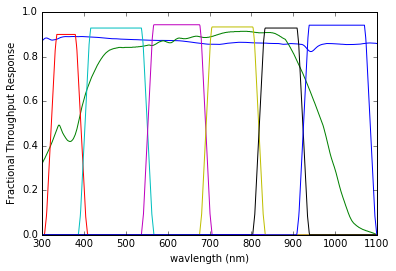

In [6]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, lensTotalThru, label='Total Camera lens throughput')
_ = plt.plot(detThru[:,0], detThru[:,1], label='Detector response')
_ = plt.plot(uThru[:,0], uThru[:,1], label='u-band filter response')
_ = plt.plot(gThru[:,0], gThru[:,1], label='g-band filter response')
_ = plt.plot(rThru[:,0], rThru[:,1], label='r-band filter response')
_ = plt.plot(iThru[:,0], iThru[:,1], label='i-band filter response')
_ = plt.plot(zThru[:,0], zThru[:,1], label='z-band filter response')
_ = plt.plot(yThru[:,0], yThru[:,1], label='y-band filter response')
#_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(componentPlotFile)

In [7]:
uCamThru = lensTotalThru * detThru[:,1] * uThru[:,1]
gCamThru = lensTotalThru * detThru[:,1] * gThru[:,1]
rCamThru = lensTotalThru * detThru[:,1] * rThru[:,1]
iCamThru = lensTotalThru * detThru[:,1] * iThru[:,1]
zCamThru = lensTotalThru * detThru[:,1] * zThru[:,1]
yCamThru = lensTotalThru * detThru[:,1] * yThru[:,1]

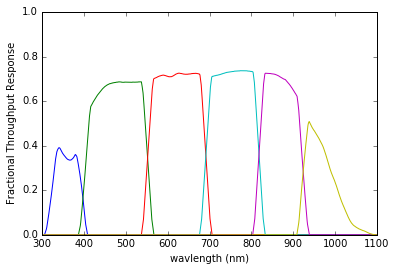

In [8]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(wavelen, uCamThru, label='Camera u-band total throughput')
_ = plt.plot(wavelen, gCamThru, label='Camera g-band total throughput')
_ = plt.plot(wavelen, rCamThru, label='Camera r-band total throughput')
_ = plt.plot(wavelen, iCamThru, label='Camera i-band total throughput')
_ = plt.plot(wavelen, zCamThru, label='Camera z-band total throughput')
_ = plt.plot(wavelen, yCamThru, label='Camera y-band total throughput')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(camPlotFile)

In [10]:
np.savetxt(uCamFile, zip(wavelen, uCamThru))
np.savetxt(gCamFile, zip(wavelen, gCamThru))
np.savetxt(rCamFile, zip(wavelen, rCamThru))
np.savetxt(iCamFile, zip(wavelen, iCamThru))
np.savetxt(zCamFile, zip(wavelen, zCamThru))
np.savetxt(yCamFile, zip(wavelen, yCamThru))